## ADABOOST PRUEBA 3
PROYECTO DE GESTIÓN DE REDES - Gestión de redes IoT

In [1]:
import pandas as pd
import os

# Definir rutas de las carpetas
test_path = "Test_Prueba3"
train_path = "Train_Prueba3"

# Cargar archivos de prueba
test_files = {
    "Benigno": "Benign_test.csv",
    "Maligno": "Maligno_test.csv"
}

test_data = {name: pd.read_csv(os.path.join(test_path, file)) for name, file in test_files.items()}

# Cargar archivos de entrenamiento
train_files = {
    "Benigno": "Benign_train.csv",
    "Maligno": "Maligno_train.csv"
}

train_data = {name: pd.read_csv(os.path.join(train_path, file)) for name, file in train_files.items()}

In [2]:
# Acceder a un DataFrame 
df_analizar = test_data["Benigno"]
df_analizar.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack_Label
0,227.8,6.0,64.0,24502.562704,24502.562704,0.0,0.0,0.0,0.0,0.5,...,214.732903,80.2,1.694703e+08,13.5,15.986909,304.317403,46658.604609,1.0,244.6,Benign
1,419.7,6.0,64.0,2.803381,2.803381,0.0,0.0,0.0,0.0,0.5,...,212.496572,80.7,1.694703e+08,13.5,16.395363,301.176484,45690.432897,1.0,244.6,Benign
2,465.6,6.0,64.0,22401.599171,22401.599171,0.0,0.0,0.0,0.0,0.5,...,10.824942,80.8,1.002255e-01,5.5,12.275612,15.308779,136.782165,0.9,38.5,Benign
3,635.2,6.0,64.0,2.291666,2.291666,0.0,0.0,0.0,0.0,0.5,...,15.790866,78.2,1.694703e+08,13.5,12.571921,22.372255,250.650009,1.0,244.6,Benign
4,612.5,6.0,64.0,1.924983,1.924983,0.0,0.0,0.0,0.0,0.5,...,15.714200,78.3,1.469851e-04,5.5,12.568932,22.223235,280.973305,0.9,38.5,Benign


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Unir los DataFrames de entrenamiento y prueba
train_df = pd.concat(train_data.values(), ignore_index=True)
test_df = pd.concat(test_data.values(), ignore_index=True)

# Separar características y etiquetas
X_train = train_df.drop(columns=['Attack_Label'])
y_train = train_df['Attack_Label']
X_test = test_df.drop(columns=['Attack_Label'])
y_test = test_df['Attack_Label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo AdaBoost con un árbol de decisión como base
base_estimator = DecisionTreeClassifier(max_depth=3)  
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=200, learning_rate=0.01, random_state=42)
# Mejores hiperparámetros: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 200}
# Entrenar el modelo
adaboost_model.fit(X_train, y_train)



# Hacer predicciones
y_pred = adaboost_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Promedio ponderado
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9787
Precision: 0.9793
Recall: 0.9787
F1-Score: 0.9777


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

base_estimator = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)


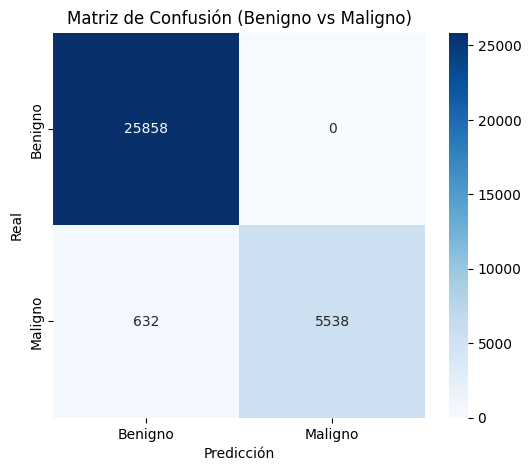

Accuracy: 0.9803
Precision: 1.0000
Recall: 0.8976
F1-Score: 0.9460


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Mapear las etiquetas originales a dos clases: Benigno (0) y Maligno (1)
benigno_label = label_encoder.transform(['Benign'])[0]  # Obtener el valor numérico de "Benigno"
y_test_binary = np.where(y_test == benigno_label, 0, 1)
y_pred_binary = np.where(y_pred == benigno_label, 0, 1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Benigno vs Maligno)')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas para la clasificación binaria (Benigno vs Maligno)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Mostrar resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')